In [1]:
import numpy as np
import textblob as textblob
import praw
from datetime import datetime
import matplotlib.pyplot as plt
import json
import creds
from pprint import pprint
import pandas as pd
from time import time

In [2]:
#Importing NLTK library and associated packaged

import nltk
nltk.__version__
# nltk.download('vader_lexicon')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag_sents
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Importing textblob to compare sentiment analysis results with those from nltk

from textblob import TextBlob

In [3]:
# Reddit API wrapper 

reddit = praw.Reddit(client_id=creds.client_id, \
                     client_secret=creds.client_secret, \
                     user_agent=creds.user_agent, \
                     username=creds.username, \
                     password=creds.password)

In [4]:
#Getting daily ID for the Coronavirus daily discussion post

subreddit = reddit.subreddit('Coronavirus')

In [5]:
#Gets discussion id for that days daily discussion

discussion_id = str(list(subreddit.hot(limit=1)))
final_id = discussion_id.replace("[Submission(id='","").replace("')]","")
print(final_id)

ghnx5y


In [6]:
#pulls all discussion ids available 

discussion_ids = []

for submission in subreddit.search('Daily Discussion Post'):
    if 'Daily Discussion Post' in submission.title:
        discussion_ids.append(submission.id)
    
print(len(discussion_ids))

85


r"/Users/AllysonEnglish/Active/Active/coronavirus_subreddit_full.json"

In [112]:
def coronavirus_new_comments(json_file_path, discussion_ids, reddit = reddit):
    
    with open(json_file_path, "r") as f:
        full_comment_dict = json.load(f)

    st = time()

    print("There are", len(discussion_ids), "daily discussions to grab comments from.\n")

    sid = SentimentIntensityAnalyzer()

    for disc_id in discussion_ids:
        disc_dict = {}      

        submission = reddit.submission(disc_id)    
        submission.comments.replace_more(limit=0)

        print(disc_id, " number of comments:  ", len(submission.comments))
        
        if disc_id not in full_comment_dict.keys():
            full_comment_dict[disc_id] = {}

        for user_comment in submission.comments:

            if str(user_comment) not in full_comment_dict[disc_id].keys():

                #submission.comments.replace_more(limit=0)
                comment = user_comment.body
                comment = comment.replace('\n', ' ')
                comment = comment.replace('I\'m', 'i am').replace('i\'m', 'i am').replace('i\'ll', 'i will').replace('I\'ll', 'i will')
                comment = comment.lower()

                #grab date/ time info for each comment 
                utc = submission.created_utc
                dt_object = datetime.fromtimestamp(utc)  

                #performing sentiment analysis
                ss = sid.polarity_scores(comment)


                token_dict = {"comment_body" : comment}
                token_dict.update({"month":dt_object.strftime("%B")})
                token_dict.update({"day" : dt_object.strftime("%d")})
                token_dict.update(ss)
                disc_dict.update({str(user_comment): token_dict})

                full_comment_dict.update({disc_id: disc_dict})

    #update json file with new comments
    with open(json_file_path, "w") as outfile:
        json.dump(full_comment_dict, outfile, indent = 4)

    print("\nProcessing time:", round((time()-st)/60, 2), "minutes.")
    return

In [11]:
st = time()

print("There are", len(discussion_ids), "daily discussions to grab comments from.\n")

sid = SentimentIntensityAnalyzer()

for disc_id in discussion_ids:
    disc_dict = {}      
    
    submission = reddit.submission(disc_id)    
    submission.comments.replace_more(limit=0)
    
    print(disc_id, " number of comments:  ", len(submission.comments))
    if disc_id not in comment_dict.keys():
        comment_dict[disc_id] = {}
        
    for user_comment in submission.comments:

        if str(user_comment) not in comment_dict[disc_id].keys():

            #submission.comments.replace_more(limit=0)
            comment = user_comment.body
            comment = comment.replace('\n', ' ')
            comment = comment.replace('I\'m', 'i am').replace('i\'m', 'i am').replace('i\'ll', 'i will').replace('I\'ll', 'i will')
            comment = comment.lower()

            #grab date/ time info for each comment 
            utc = submission.created_utc
            dt_object = datetime.fromtimestamp(utc)  

            #performing sentiment analysis
            ss = sid.polarity_scores(comment)


            token_dict = {"comment_body" : comment}
            token_dict.update({"month":dt_object.strftime("%B")})
            token_dict.update({"day" : dt_object.strftime("%d")})
            token_dict.update(ss)
            disc_dict.update({str(user_comment): token_dict})

            comment_dict.update({disc_id: disc_dict})

# with open(r"/Users/AllysonEnglish/Active/Active/coronavirus_subreddit_full.json", "w") as outfile: 
#     json.dump(comment_dict, outfile, indent = 4)
    
print("\nProcessing time:", round((time()-st)/60, 2), "minutes.")

There are 85 daily discussions to grab comments from.

gh1uuu  number of comments:   112
gftmeo  number of comments:   127
ghnx5y  number of comments:   107
gekees  number of comments:   135
ggfrvq  number of comments:   112
gf6xnu  number of comments:   120
gdbzvl  number of comments:   123
gdy3p3  number of comments:   134
ga9u7y  number of comments:   148
gcqx67  number of comments:   116
gaw27w  number of comments:   143
g8eo6c  number of comments:   172
gbih0c  number of comments:   125
g912p1  number of comments:   176
gc6tdq  number of comments:   116
g61hda  number of comments:   178
fjla5p  number of comments:   356
g7tugs  number of comments:   167
flad2s  number of comments:   334
g9nks9  number of comments:   120
g6n0i9  number of comments:   158
g5fli1  number of comments:   188
fvz4b2  number of comments:   232
g32elm  number of comments:   177
g3nu29  number of comments:   157
fj1m3e  number of comments:   356
ftmp3u  number of comments:   256
fmfa26  number of comments:

In [13]:
len(comment_dict['f8n49s'])

67

In [119]:
discussion_id = json_data.keys()

m_date = []
d_date = []
negative = []
neutral = []
positive = []
compound = []
comment_id = []

for k in json_data.keys():
    
    for y in json_data[k].keys():
        comment_id.append(y)
    
    for x in json_data[k]:
        m_date.append(json_data[k][x].get('month'))
        d_date.append(json_data[k][x].get('day'))
        negative.append(json_data[k][x].get('neg'))
        neutral.append(json_data[k][x].get('neu'))
        positive.append(json_data[k][x].get('pos'))
        compound.append(json_data[k][x].get('compound'))

    
d = {'comment_id' : comment_id, 'month': m_date, 'date': d_date, 'positive': positive, 'neutral': neutral, 'negative': negative, 'compound': compound}
df = pd.DataFrame(data=d)
df = df[df.positive != 1.0000]
df.head()

,comment_id,month,date,positive,neutral,negative,compound
0,fq8tliu,May,10,0.000,1.000,0.000,0.0000
1,fq96f6i,May,10,0.097,0.746,0.157,-0.8316
2,fq8oonj,May,10,0.034,0.879,0.087,-0.9731
3,fq6hce7,May,10,0.178,0.766,0.057,0.6627
4,fq67hfw,May,10,0.161,0.717,0.122,0.6126


In [136]:
df['DOM'] = df['month']+df['date']
new_df = df.groupby('DOM').mean()


In [121]:
avrg_by_day = df.groupby('DOM').mean().reset_index()

def sort_days(x):
    if x.startswith('F'):
        return 2
    elif x.startswith('Mar'):
        return 3
    elif x.startswith('Ap'):
        return 4
    elif x.startswith('May'):
        return 5

avrg_by_day['month_num'] = avrg_by_day['DOM'].apply(sort_days) 

def day_num(x):
    return int(x[-2:])

avrg_by_day['day_num'] = avrg_by_day['DOM'].apply(day_num)

avrg_by_day.sort_values(['month_num', 'day_num'], inplace = True)
avrg_by_day.reset_index(drop=True, inplace= True)

In [122]:
df['month_num'] = df['DOM'].apply(sort_days)
df['day_num'] = df['DOM'].apply(day_num)
df.sort_values(['month_num', 'day_num'], inplace = True)

In [137]:
new_df = new_df.reset_index()

In [123]:
df.head()

,comment_id,month,date,positive,neutral,negative,compound,DOM,month_num,day_num
16702,fi87aru,February,20,0.000,0.663,0.337,-0.6808,February20,2,20
16703,fi8t8ty,February,20,0.090,0.776,0.134,-0.3642,February20,2,20
16704,fi87yil,February,20,0.000,1.000,0.000,0.0000,February20,2,20
16705,fi929rs,February,20,0.063,0.937,0.000,0.6662,February20,2,20
16706,fi88d36,February,20,0.084,0.916,0.000,0.4137,February20,2,20


In [127]:
df['negative'].mean(), df['positive'].mean()

(0.08431107039423127, 0.07916525799397124)

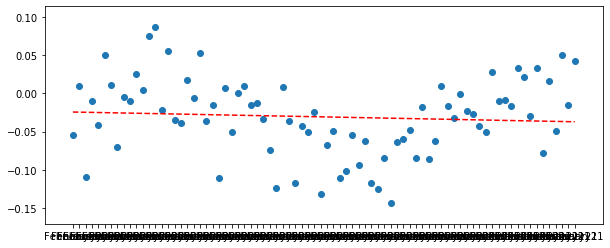

In [138]:
y = new_df['compound']
x = new_df.index

#ploting with matplotlib

fig, ax = plt.subplots(figsize = (10,4))
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.scatter(x, y)


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--")

# plt.show()

# Workdesk

In [ ]:
# updating csv with new inputs

old_df = pd.read_csv(r'/Users/AllysonEnglish/Active/Active/sentiment_analysis_draft1.csv')
to_add = df[~df['discussion_id'].isin(old_df['discussion_id'])]
to_add.to_csv(r'/Users/AllysonEnglish/Active/Active/sentiment_analysis_draft1.csv', mode='a', header=False, index=False)

In [ ]:
# why is this marked as positive?
comment_dict['fq3a3nl']

In [ ]:
tagged_tokens = []

submission = reddit.submission(id=final_id)
for top_level_comment in submission.comments:
    submission.comments.replace_more(limit=0)
    comment = top_level_comment.body
    comment = comment.replace('\n', ' ')
    try:
        tagged = nltk.pos_tag(comment.split(' '))
        tagged_tokens.append(tagged)
    except IndexError:
        continue

In [ ]:
tagged_tokens

In [ ]:
nouns = 0
adjectives = 0

for pair in tagged_tokens:
    for tag in pair:
        if tag[1] == 'JJ':
            adjectives += 1
        elif tag[1] == 'NN':
            nouns += 1
        elif tag[1] == 'NNS':
            nouns += 1
    

print('There are', nouns, 'nouns in this text.')
print('There are', adjectives, 'adjectives in this text.')

In [ ]:
len(tagged_tokens)

In [ ]:
len([x for y in tagged_tokens for x in y])

In [ ]:
reddit_tokens = []

submission = reddit.submission(id=final_id)
for top_level_comment in submission.comments:
    submission.comments.replace_more(limit=0)
    reddit_tokens.append(top_level_comment.body)

In [ ]:
tagged_tokens = []

for token in reddit_tokens:
    try:
        tagged = nltk.pos_tag(token.split(' '))
        tagged_tokens.append(tagged)
    except IndexError:
        continue

In [ ]:
tagged_tokens[5]

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sid = SentimentIntensityAnalyzer()
for sentence in sentences:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

In [ ]:
toast = sid.polarity_scores(bread)

In [ ]:
bread = reddit_tokens[4]

In [ ]:
cheese = ss

In [ ]:
sid.score_valence(cheese, bread)

In [ ]:
sid = SentimentIntensityAnalyzer()
for comment in reddit_tokens:
    print(comment)
    ss = sid.polarity_scores(comment)
    for k in sorted(ss):
        print('{0}: {1}%, '.format(k, round(ss[k]*100, 2)), end='')
        print()

In [ ]:
reddit_tokens

In [ ]:
# tagged_comments = nltk.pos_tag(comment.split(" "))

In [ ]:
# [item.replace('.','') for item in wordlist]
#     wordlist = [item.replace(':','') for item in wordlist]
#     wordlist = [item.replace('-','') for item in wordlist]
#     wordlist = [item.replace('?','') for item in wordlist]
#     wordlist = [item.replace('!','') for item in wordlist]
#     wordlist = [item.replace('*','') for item in wordlist]
#     wordlist = [item.replace(',','') for item in wordlist]

In [ ]:
nltk.pos_tag(comment.split(' '))

In [ ]:
tagged_tokens = []

submission = reddit.submission(id=final_id)
for top_level_comment in submission.comments:
    submission.comments.replace_more(limit=0)
    comment = top_level_comment.body
    comment.replace('\n', ' ')
    try:
        tagged = nltk.pos_tag(comment.split(' '))
        tagged_tokens.append(tagged)
    except IndexError:
        continue

In [ ]:
nltk.pos_tag(submission.comments.body.split(' '))

In [ ]:
allwords = []
submission.comments.replace_more(limit=0)
for top_level_comment in submission.comments:
    wordlist = top_level_comment.body.split()
    wordlist = [item.replace('.','') for item in wordlist]
    wordlist = [item.replace(':','') for item in wordlist]
    wordlist = [item.replace('-','') for item in wordlist]
    wordlist = [item.replace('?','') for item in wordlist]
    wordlist = [item.replace('!','') for item in wordlist]
    wordlist = [item.replace('*','') for item in wordlist]
    wordlist = [item.replace(',','') for item in wordlist]
    wordlist = [item.replace('(','').replace(')','') for item in wordlist]
    allwords.extend(wordlist)
    
print(allwords)

In [ ]:
item = "allys'on" "aren't"
item.find("'")

In [ ]:
greeting = 'sup homie {}!'
names = ['bob', 'joe', 'ally']

for name in names:
    print(greeting.format(name))

In [ ]:
if "n't":
    "n't"
else:
    item.replace("''"," ")

In [ ]:
item.replace("'", '').replace('"', '')

In [ ]:
allwords = []
submission.comments.replace_more(limit=0)
for top_level_comment in submission.comments:
    wordlist = top_level_comment.body.split()
    wordlist = [item.replace('.','') for item in wordlist]
    wordlist = [item.replace(':','') for item in wordlist]
    wordlist = [item.replace('-','') for item in wordlist]
    wordlist = [item.replace('?','') for item in wordlist]
    wordlist = [item.replace('!','') for item in wordlist]
    wordlist = [item.replace('*','') for item in wordlist]
    wordlist = [item.replace(',','') for item in wordlist]
    wordlist = [item.replace('(','').replace(')','') for item in wordlist]
    allwords.extend(wordlist)
    
print(allwords)

In [ ]:
for word in allwords:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = frequency.keys()
 
for words in frequency_list:
    print (words, frequency [words])

In [ ]:
frequency = {}
for w in wordlist:
    count= frequency.get(w,0)
    frequency[w]= count + 1
    wordfreq.append(wordlist.count(w))

frequency_list = frequency.keys()

for w in frequency_list:
    print (w, frequency[w])

In [ ]:
from praw.models import MoreComments
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue

In [ ]:
submission.comments.replace_more(limit=None)
comment_queue = submission.comments[:]  # Seed with top-level
while comment_queue:
    comment = comment_queue.pop(0)
    print(comment.body)
    comment_queue.extend(comment.replies)

In [ ]:
submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    print(comment.body)

In [ ]:
wordstring = top_level_comment.body
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue

In [ ]:
wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

In [ ]:
wordstring = 'it was the best of times it was the worst of times '
wordstring += 'it was the age of wisdom it was the age of foolishness'

wordlist = wordstring.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

In [ ]:
lotsofcomments = post.comments.list()

In [ ]:
onecomment = lotsofcomments[0]
onecomment

In [ ]:
onecomment.body

In [ ]:
submission = reddit.submission(id='3g1jfi')

In [ ]:
for top_level_comment in submission.comments:
    print(top_level_comment.body)

In [ ]:
total_text = top_level_comment.body
total_analysis = total_text.split()

In [ ]:
neutral

In [ ]:
neutral
positive 
negative 
compound 
token_dict 
score 

In [ ]:
tokens[4]

In [ ]:
df.head()

In [ ]:
# blob = TextBlob("This excellent practice sentance is the best one to ues due to it's perfectly written syntax and great message.")
# for np in blob.noun_phrases:
#     print(np)

# for words, tags in blob.tags:
#     print(words, tags)
    
# for ngram in blob.ngrams(3):
#     print(ngram)

# blob.sentiment



In [ ]:
blob = TextBlob(comment_str)

In [ ]:
tokens

In [ ]:
txt_blob_dict = {}

for each_token in tokens:
    analysis_tok = TextBlob(each_token)
    txt_blob_dict.update({each_token: analysis_tok.sentiment})

In [ ]:
for tok in tokens:
    tok.replace("\n","")
    print(tok)
    

In [ ]:
comment_dict['fq67hfw']

In [ ]:
sid.polarity_scores(comment_dict['fq67hfw'].capitalize())

In [ ]:
for words in TextBlob(comment_dict['fq67hfw']).ngrams(5):
    print(words)

In [ ]:
tb_score = TextBlob(comment_dict['fq67hfw']).sentiment
tb_score

In [ ]:
test = tokens[1]

In [ ]:
test = test.replace("I\'m","I am").replace("\n"," ").replace("i\'ll","i will").replace("i\'m","i will").lower()

In [ ]:
sid.polarity_scores(test)

In [ ]:
tb_score = TextBlob(test).sentiment

In [ ]:
tb_score

In [ ]:
trainer = NaiveBayesClassifier.train

daily_discussion = list(subreddit.hot(limit=1))
discussion_id = (str(daily_discussion))
final_id = discussion_id.replace("[Submission(id='","").replace("')]","")
print(final_id)

submission = reddit.submission(id=final_id)

In [ ]:
#Code for running textblob.


# blob = TextBlob("This excellent practice sentance is the best one to ues due to it's perfectly written syntax and great message.")
# for np in blob.noun_phrases:
#     print(np)

# for words, tags in blob.tags:
#     print(words, tags)
    
# for ngram in blob.ngrams(3):
#     print(ngram)

# blob.sentiment

In [ ]:

#ploting with matplotlib

# plt.plot(y, x)
# plt.show()